In [1072]:
%matplotlib inline

import pandas as pd
from IPython.display import display
pd.options.display.max_columns = None
import gc
import matplotlib.pyplot as plt
import seaborn as sb
from fastai.imports import *
# from fastai.structured import *
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics
import missingno as msno
from sklearn.model_selection import train_test_split
import statistics
from imblearn.over_sampling import SMOTE
import numpy as np

In [1073]:
df = pd.read_csv('bank-marketing/bank-additional-full.csv', sep=';')
# df['id'] = df.index + 1

In [1074]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [1075]:
df.shape

(41188, 21)

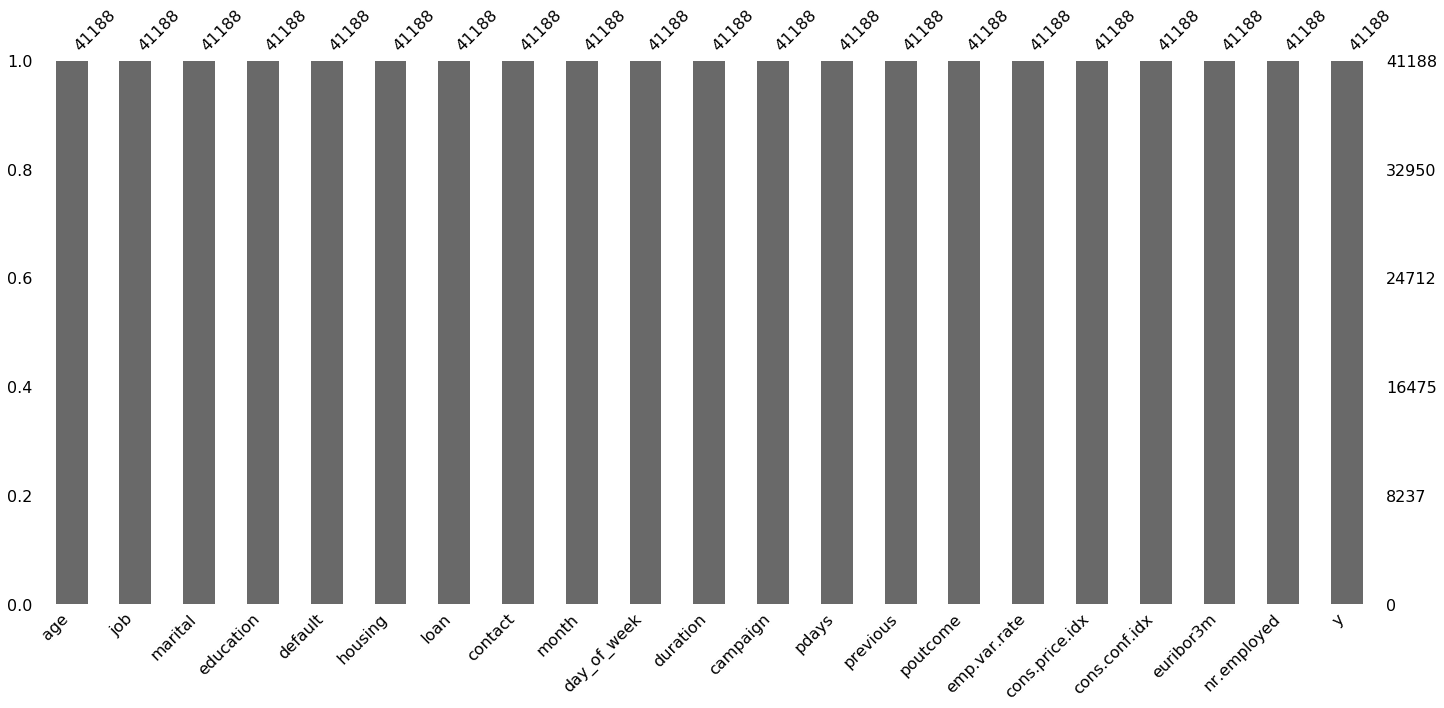

In [1076]:
msno.bar(df)

In [1077]:
# Split into predictor and response dataframes.

X_df = df.drop('y', axis=1)
y = df['y']

X_df.shape,y.shape

((41188, 20), (41188,))

In [1078]:
# Map response variable to integers 0,1.

y = pd.Series(np.where(y.values == 'yes',1,0), y.index)

In [1079]:
y.value_counts()

0    36548
1     4640
dtype: int64

In [1080]:
# Separating with continuous and categorical variables.

X_cont = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed']
X_cat = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

cont_df = X_df[X_cont]
cat_df = X_df[X_cat]

In [1081]:
# Converting categorical features to numerical values.

cat_df.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent


In [1082]:
# Initial numeric dataframe

X_df = cont_df.join(pd.get_dummies(cat_df))

In [1083]:
X_df.shape

(41188, 61)

In [1084]:
X_df.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1.1,93.994,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1.1,93.994,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1.1,93.994,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1.1,93.994,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [1085]:
# Split into train and test sets.

X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size = 0.2, random_state = 10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((32950, 61), (8238, 61), (32950,), (8238,))

In [1086]:
# Initial logistic regression

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=0.001)
model_base = clf.fit(X_train, y_train)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [1087]:
y_pred = model_base.predict(X_test)
model_base.score(X_test, y_test)

print("Model accuracy is", model_base.score(X_test, y_test))

Model accuracy is 0.8963340616654528


In [1088]:
metrics.confusion_matrix(y_test, y_pred)
# print(metrics.classification_report(y_test, y_pred))

array([[7219,   91],
       [ 763,  165]])

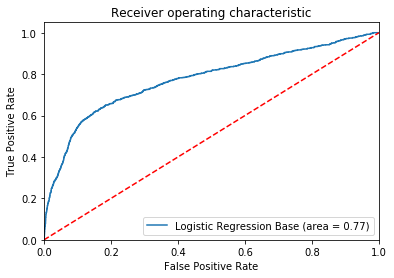

In [1089]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
# logit_roc_auc = roc_auc_score(y_test, model_base.predict(X_test))
# fpr, tpr, thresholds = roc_curve(y_test, model_base.predict_proba(X_test)[:,1])
# plt.figure()

probs = model_base.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
logit_roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, label='Logistic Regression Base (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [1090]:
df.apply(lambda x: len(x.unique()), axis=0)

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [1091]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [1092]:
# Label Encode instead of dummy variables

mappings = []

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

label_df = df.drop('y', axis=1)
for i, col in enumerate(label_df):
    if label_df[col].dtype == 'object':
        label_df[col] = label_encoder.fit_transform(np.array(label_df[col].astype(str)).reshape((-1,)))
        mappings.append(dict(zip(label_encoder.classes_, range(1, len(label_encoder.classes_)+1))))

In [1093]:
X_train, X_test, y_train, y_test = train_test_split(label_df, y, test_size = 0.2, random_state = 10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((32950, 20), (8238, 20), (32950,), (8238,))

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Model accuracy is 0.9062879339645545


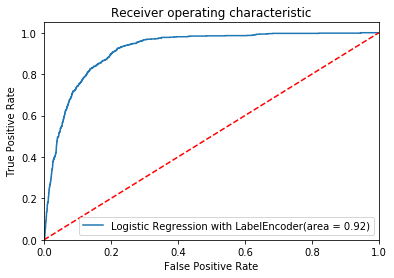

In [1094]:
clf = LogisticRegression()
model_label = clf.fit(X_train, y_train)
# y_pred = model_norm.predict(X_test)
print("Model accuracy is", model_label.score(X_test, y_test))

# logit_roc_auc = roc_auc_score(y_test, model_norm.predict(X_test))
# fpr, tpr, thresholds = roc_curve(y_test, model_norm.predict_proba(X_test)[:,1])

probs = model_label.predict_proba(X_test)
preds = probs[:,1]
labelfpr, labeltpr, labelthreshold = metrics.roc_curve(y_test, preds)
label_roc_auc = metrics.auc(labelfpr, labeltpr)

plt.figure()
plt.plot(labelfpr, labeltpr, label='Logistic Regression with LabelEncoder(area = %0.2f)' % label_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [1095]:
mappings

[{'admin.': 1,
  'blue-collar': 2,
  'entrepreneur': 3,
  'housemaid': 4,
  'management': 5,
  'retired': 6,
  'self-employed': 7,
  'services': 8,
  'student': 9,
  'technician': 10,
  'unemployed': 11,
  'unknown': 12},
 {'divorced': 1, 'married': 2, 'single': 3, 'unknown': 4},
 {'basic.4y': 1,
  'basic.6y': 2,
  'basic.9y': 3,
  'high.school': 4,
  'illiterate': 5,
  'professional.course': 6,
  'university.degree': 7,
  'unknown': 8},
 {'no': 1, 'unknown': 2, 'yes': 3},
 {'no': 1, 'unknown': 2, 'yes': 3},
 {'no': 1, 'unknown': 2, 'yes': 3},
 {'cellular': 1, 'telephone': 2},
 {'apr': 1,
  'aug': 2,
  'dec': 3,
  'jul': 4,
  'jun': 5,
  'mar': 6,
  'may': 7,
  'nov': 8,
  'oct': 9,
  'sep': 10},
 {'fri': 1, 'mon': 2, 'thu': 3, 'tue': 4, 'wed': 5},
 {'failure': 1, 'nonexistent': 2, 'success': 3}]

In [1096]:
educ_order = ['unknown', 'illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'professional.course', 'university.degree']
month_order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
day_order = ['mon', 'tue', 'wed', 'thu', 'fri']

In [1097]:
mappings2 = []

# using cat.codes for order, one hot for high cardinality and weak case of cardinality.

def ordered_labels(df, col, order):
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.reorder_categories(order, ordered=True)
    df[col] = df[col].cat.codes.astype(int)

label_df_2 = df.drop('y', axis=1)

# Use dummy variables for occupation
label_df_2 = pd.concat([label_df_2, pd.get_dummies(label_df_2['job'])],axis=1).drop('job',axis=1)

# Use ordered cat.codes for days, months, and education
ordered_labels(label_df_2, 'education', educ_order)
ordered_labels(label_df_2, 'month', month_order)
ordered_labels(label_df_2, 'day_of_week', day_order)

# Same label encoding for rest since low cardinality
for i, col in enumerate(label_df_2):
    if label_df_2[col].dtype == 'object':
        label_df_2[col] = label_encoder.fit_transform(np.array(label_df_2[col].astype(str)).reshape((-1,)))
        mappings2.append(dict(zip(label_encoder.classes_, range(1, len(label_encoder.classes_)+1))))

label_df_2.head()

,age,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,56,1,2,0,0,0,1,2,0,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0
1,57,1,5,1,0,0,1,2,0,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0
2,37,1,5,0,2,0,1,2,0,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0
3,40,1,3,0,0,0,1,2,0,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0
4,56,1,5,0,0,2,1,2,0,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Model accuracy is 0.9054382131585337


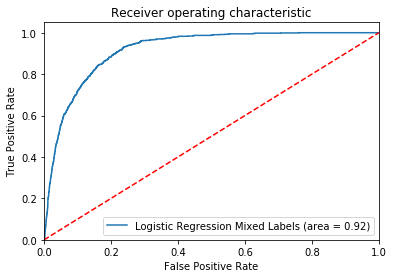

In [1098]:
X_train, X_test, y_train, y_test = train_test_split(label_df_2, y, test_size = 0.2, random_state = 10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

clf = LogisticRegression()
model_mix = clf.fit(X_train, y_train)
# y_pred = model_norm.predict(X_test)
print("Model accuracy is", model_mix.score(X_test, y_test))

# logit_roc_auc = roc_auc_score(y_test, model_norm.predict(X_test))
# fpr, tpr, thresholds = roc_curve(y_test, model_norm.predict_proba(X_test)[:,1])

classes = model_mix.predict(X_test)
probs = model_mix.predict_proba(X_test)
preds = probs[:,1]
mixfpr, mixtpr, mixthreshold = metrics.roc_curve(y_test, preds)
mix_roc_auc = metrics.auc(mixfpr, mixtpr)

plt.figure()
plt.plot(mixfpr, mixtpr, label='Logistic Regression Mixed Labels (area = %0.2f)' % mix_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [1099]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((32950, 31), (8238, 31), (32950,), (8238,))

In [1100]:
print(metrics.classification_report(classes, y_test))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95      7691
           1       0.38      0.64      0.47       547

   micro avg       0.91      0.91      0.91      8238
   macro avg       0.67      0.78      0.71      8238
weighted avg       0.93      0.91      0.92      8238



## Feature Importance

In [1101]:
# Feature importance rankings.

weights = zip(label_df_2.columns, model_mix.coef_[0])
ranked_weights = sorted(weights, key=lambda x: x[1], reverse = True)

In [1102]:
# Top 10 positive feature importance

ranked_weights[:10]

[('cons.price.idx', 0.3272272459319787),
 ('poutcome', 0.06759240769153327),
 ('marital', 0.05947187404904009),
 ('education', 0.04536737302323758),
 ('cons.conf.idx', 0.04227774129770908),
 ('retired', 0.03165513179315147),
 ('admin.', 0.031390520684890386),
 ('student', 0.025946308748636675),
 ('month', 0.024844476000614592),
 ('technician', 0.010987538755583816)]

In [1103]:
# Top 10 negative feature importance

ranked_weights[-10:]

[('management', -0.006943426501322705),
 ('loan', -0.013977760168058474),
 ('services', -0.024377312522738823),
 ('campaign', -0.032557877981836354),
 ('previous', -0.038554343183285184),
 ('default', -0.0648101239946268),
 ('blue-collar', -0.06627404571067685),
 ('contact', -0.08369289222002993),
 ('emp.var.rate', -0.21690057832246748),
 ('euribor3m', -0.24925166226937054)]

In [1104]:
abs_weights = zip(label_df_2.columns, model_mix.coef_[0]) 
abs_ranked_weights = sorted(abs_weights, key=lambda x: abs(x[1]), reverse = True)
abs_ranked_weights[:10]

[('cons.price.idx', 0.3272272459319787),
 ('euribor3m', -0.24925166226937054),
 ('emp.var.rate', -0.21690057832246748),
 ('contact', -0.08369289222002993),
 ('poutcome', 0.06759240769153327),
 ('blue-collar', -0.06627404571067685),
 ('default', -0.0648101239946268),
 ('marital', 0.05947187404904009),
 ('education', 0.04536737302323758),
 ('cons.conf.idx', 0.04227774129770908)]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

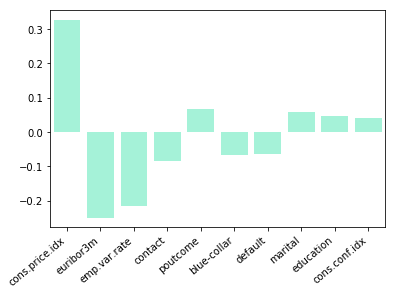

In [1105]:
# Absolute value feature importance plot

labels, weights = zip(*abs_ranked_weights[:10])
sb.barplot(x = pd.Series(labels), y = pd.Series(weights), color='aquamarine', alpha=0.8)
plt.xticks(rotation=40, ha='right')

In [1106]:
# Pairplot to look at distributions.

# sb.pairplot(cont_df)

## Feature engineering

In [1107]:
X_df_2 = label_df_2.copy()

In [1108]:
# Creating binary variable for whether there was previous contact.

X_df_2[(X_df_2['previous'] == 0) & (X_df_2['pdays'] != 999)]

,age,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown


In [1109]:
X_df_2['previous_contact'] = np.where(X_df_2['pdays'] == 999, 0, 1)

# X_df_2 = X_df_2.drop('pdays', axis = 1)

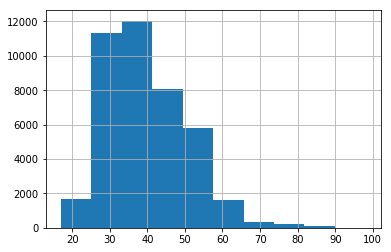

In [1110]:
X_df_2['age'].hist()

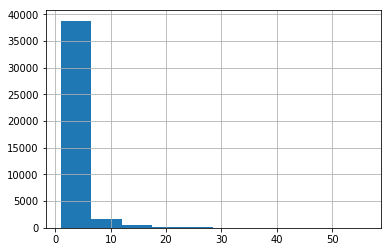

In [1111]:
X_df_2['campaign'].hist()

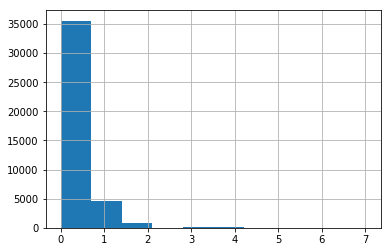

In [1112]:
X_df_2['previous'].hist()

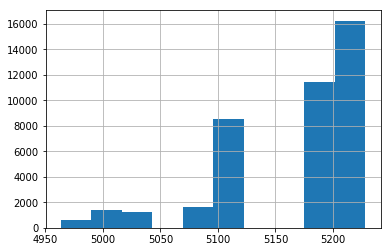

In [1113]:
X_df_2['nr.employed'].hist()

In [1114]:
def bins5(df, col):
    df[col] = pd.cut(df[col], 5, labels=range(5)).astype(int)

In [1115]:
bins5(X_df_2, 'age')
bins5(X_df_2, 'campaign')
bins5(X_df_2, 'previous')
bins5(X_df_2, 'nr.employed')

In [1116]:
# SMOTE for rebalancing

y.value_counts()[1]/y.value_counts().sum()

0.11265417111780131

In [1117]:
# Threshold setting for coefficient size.

coef_thresh = np.percentile(abs(model_mix.coef_[0]), 10)
coef_thresh

0.0033424689799730154

In [1118]:
# Features with very low coefficients that do not contribute much to the model.

low_coefs = [feature[0] for feature in abs_ranked_weights if abs(feature[1]) < coef_thresh]
low_coefs

['housemaid', 'pdays', 'unknown']

In [1119]:
# Drop low importance features

# X_df_2 = X_df_2.drop(columns = low_coefs)
X_df_2.shape

(41188, 32)

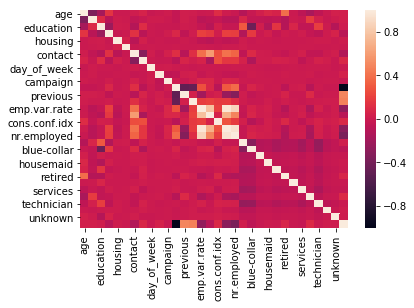

In [1120]:
sb.heatmap(X_df_2.corr())

In [1121]:
# Highly correlated features

corr_mat = X_df_2.corr()
half_corr_mat = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool))
half_corr_mat.head()

,age,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown,previous_contact
age,NaN,-0.367115,-0.172745,0.155196,-0.000699,-0.005032,0.015743,0.061888,-0.017328,-0.000216,0.009316,-0.034401,0.025630,0.016742,-0.002610,0.004805,0.111415,0.008032,-0.010023,-0.103111,-0.017154,0.034278,0.081086,0.061350,0.390116,-0.000509,-0.065628,-0.160948,-0.057496,-0.004555,0.041177,0.034332
marital,NaN,NaN,0.101376,-0.079450,0.010467,0.005788,-0.054501,-0.018653,0.014472,0.010290,-0.000793,-0.037942,0.030215,0.001912,-0.084210,-0.057477,-0.033783,-0.091939,-0.093401,0.075428,-0.045265,-0.047839,-0.055181,-0.051110,-0.108069,0.002293,-0.009286,0.184116,0.040090,-0.009826,0.009834,0.037973
education,NaN,NaN,NaN,-0.218989,0.020847,0.011312,-0.108651,0.115857,-0.004091,-0.015618,-0.008072,-0.021797,0.009868,0.005603,-0.038992,-0.096554,0.038230,-0.030160,-0.026079,0.297503,-0.443976,0.026201,-0.119471,0.154868,-0.106842,0.074657,-0.051706,-0.053444,0.189820,0.003098,-0.109193,0.021739
default,NaN,NaN,NaN,NaN,-0.015815,-0.003782,0.135238,-0.084322,-0.004286,-0.011794,0.015962,0.080062,-0.061552,0.023417,0.203263,0.168073,0.026522,0.195336,0.189170,-0.121372,0.176382,-0.001008,0.036796,-0.035507,0.010070,-0.004843,0.017599,-0.032609,-0.069124,0.010481,0.055630,-0.080066
housing,NaN,NaN,NaN,NaN,NaN,0.044296,-0.082186,0.031865,-0.009003,-0.007658,-0.009633,-0.010551,0.006895,-0.011783,-0.060196,-0.080504,-0.033845,-0.059277,-0.050101,0.009949,-0.015214,0.004480,-0.004205,-0.007936,-0.001892,-0.000393,-0.004397,0.004656,0.010149,0.008631,-0.001290,0.010518


In [1122]:
[col for col in half_corr_mat if any(half_corr_mat[col] > 0.9)]

['euribor3m', 'nr.employed']

In [1123]:
# X_df_2 = X_df_2.drop('euribor3m', axis=1)

In [1124]:
X_df_2.dtypes

age                   int64
marital               int64
education             int64
default               int64
housing               int64
loan                  int64
contact               int64
month                 int64
day_of_week           int64
duration              int64
campaign              int64
pdays                 int64
previous              int64
poutcome              int64
emp.var.rate        float64
cons.price.idx      float64
cons.conf.idx       float64
euribor3m           float64
nr.employed           int64
admin.                uint8
blue-collar           uint8
entrepreneur          uint8
housemaid             uint8
management            uint8
retired               uint8
self-employed         uint8
services              uint8
student               uint8
technician            uint8
unemployed            uint8
unknown               uint8
previous_contact      int64
dtype: object

In [1125]:
X_train, X_test, y_train, y_test = train_test_split(X_df_2, y, test_size = 0.2, random_state = 10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((32950, 32), (8238, 32), (32950,), (8238,))

In [1126]:
# Normalizing continuous variables

from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Model accuracy is 0.906409322651129


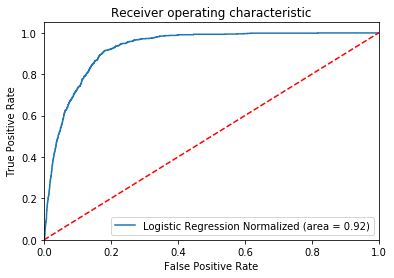

In [1127]:
clf = LogisticRegression()
model_norm = clf.fit(X_train, y_train)
# y_pred = model_norm.predict(X_test)
print('Model accuracy is',model_norm.score(X_test, y_test))

# logit_roc_auc = roc_auc_score(y_test, model_norm.predict(X_test))
# fpr, tpr, thresholds = roc_curve(y_test, model_norm.predict_proba(X_test)[:,1])

probs = model_norm.predict_proba(X_test)
preds = probs[:,1]
normfpr, normtpr, normthreshold = metrics.roc_curve(y_test, preds)
norm_roc_auc = metrics.auc(normfpr, normtpr)

plt.figure()
plt.plot(normfpr, normtpr, label='Logistic Regression Normalized (area = %0.2f)' % norm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [1128]:
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [1129]:
clf = LogisticRegression()
model_res = clf.fit(X_train_res, y_train_res)
print('Model accuracy is',model_res.score(X_test, y_test))

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Model accuracy is 0.8661082787084243


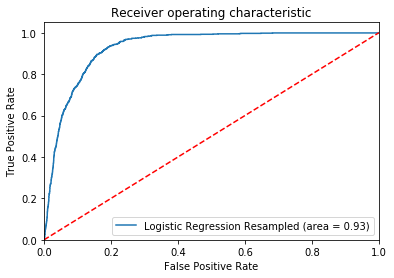

In [1130]:
probs = model_res.predict_proba(X_test)
preds = probs[:,1]
resfpr, restpr, resthreshold = metrics.roc_curve(y_test, preds)
res_roc_auc = metrics.auc(resfpr, restpr)

plt.figure()
plt.plot(resfpr, restpr, label='Logistic Regression Resampled (area = %0.2f)' % res_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [1131]:
norm_roc_auc, res_roc_auc

(0.9248634959196189, 0.9290936482852964)

In [1132]:
# Statistical logistic model

import statsmodels.api as sm
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary(xname=list(X_df_2.columns)))

Optimization terminated successfully.
         Current function value: 0.209280
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                32950
Model:                          Logit   Df Residuals:                    32918
Method:                           MLE   Df Model:                           31
Date:                Tue, 08 Jan 2019   Pseudo R-squ.:                  0.4055
Time:                        11:29:11   Log-Likelihood:                -6895.8
converged:                       True   LL-Null:                       -11599.
                                        LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
age                 -0.0397      0.144     -0.275      0.783      -0.323       0.243
marital    

## Random Forest Implementation

In [1133]:
from sklearn.ensemble import RandomForestClassifier

In [1134]:
clf = RandomForestClassifier(n_jobs=-1)

In [1135]:
X_train, X_test, y_train, y_test = train_test_split(X_df_2, y, test_size = 0.2, random_state = 10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model_rf = clf.fit(X_train, y_train)
print('Model accuracy is',model_rf.score(X_test, y_test))

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Model accuracy is 0.9059237679048313


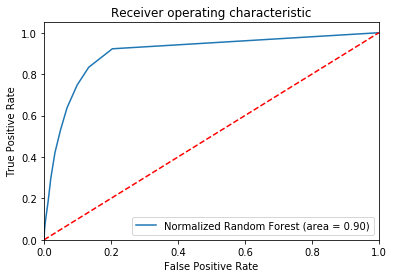

In [1136]:
probs = model_rf.predict_proba(X_test)
preds = probs[:,1]
rffpr, rftpr, rfthreshold = metrics.roc_curve(y_test, preds)
rf_roc_auc = metrics.auc(rffpr, rftpr)

plt.figure()
plt.plot(rffpr, rftpr, label='Normalized Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [1137]:
model_rf_res = clf.fit(X_train_res, y_train_res)
print('Model accuracy is',model_rf_res.score(X_test, y_test))

Model accuracy is 0.9047098810390871


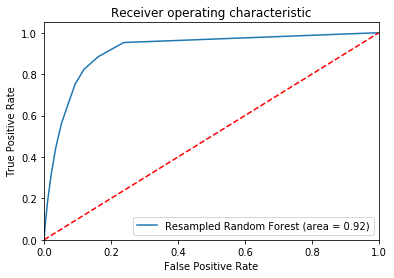

In [1138]:
probs = model_rf_res.predict_proba(X_test)
preds = probs[:,1]
rfresfpr, rfrestpr, rfresthreshold = metrics.roc_curve(y_test, preds)
rfres_roc_auc = metrics.auc(rfresfpr, rfrestpr)

plt.figure()
plt.plot(rfresfpr, rfrestpr, label='Resampled Random Forest (area = %0.2f)' % rfres_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [1139]:
# metrics.balanced_accuracy_score(y_test, preds)
y_test.dtypes
type(preds[1])

numpy.float64

In [1140]:
model_rf_res.predict(X_test)
import collections
collections.Counter(model_rf_res.predict(X_test))

Counter({0: 7343, 1: 895})

In [1141]:
metrics.balanced_accuracy_score(y_test, model_rf_res.predict(X_test))

0.7539154264352093

In [1142]:
metrics.accuracy_score(y_test, model_rf_res.predict(X_test))

0.9047098810390871

In [1143]:
metrics.roc_auc_score(y_test, model_rf_res.predict_proba(X_test)[:,1])

0.9154739757771593

## Feature Selection

In [1144]:
# Polynomial features

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
poly_feats = poly.fit(X_df_2)
poly_feats_train = poly_feats.transform(X_df_2)

poly_feats.get_feature_names(input_features=X_df_2.columns)

poly_df = pd.DataFrame(poly_feats_train, columns = poly_feats.get_feature_names(input_features=X_df_2.columns))

KeyboardInterrupt: 

In [ ]:
# Desired no. of features

feature_counts_base = list(range(10,33))
feature_counts_poly = list(range(10,101,10))

In [ ]:
# Dataframe for core set of features

X_df_2.shape

In [ ]:
# Dataframe for all polynomial features

poly_df.shape

In [ ]:
from sklearn.feature_selection import *
from sklearn.pipeline import Pipeline

In [ ]:
X_base_red = SelectKBest(f_classif, k=20).fit_transform(X_df_2, y)

select_k_best_classifier = SelectKBest(score_func=f_classif, k=5).fit_transform(X_df_2, y)

In [ ]:
X_base_red = SelectKBest(f_classif, k=5)
X_base_red.fit(X_df_2, y)
cols = X_base_red.get_support(indices=True)
X_df_2[X_df_2.columns[cols]].head()

In [ ]:
def get_reduced(method, X, y, feature_n):
    method.fit(X, y)
    features = method.get_support(indices=True)
    feaure_names = X.columns[features]
    return feature_names

## Main methods

In [ ]:
metrics_list = ['label', 'accuracy', 'balanced_accuracy', 'precision', 'average_precision', 'f1_score', 'recall', 'roc_auc']

In [ ]:
# Method for returning metrics to create dataframe with

def logistic_metrics(clf_model, X, y, resample, normalize, label, plot_roc):
    
    # Split features and target into train and test sets.
    
    X_train, X_test, y_train, y_test = train_test_split(label_df_2, y, test_size = 0.2, random_state = 10)
    
    # If resample, create equal size of minority class with SMOTE.
    
    if resample == True:
        sm = SMOTE(random_state = 2)
        X_train, y_train = sm.fit_sample(X_train, y_train.ravel())
    
    # If normalize, normalize data with MinMaxScaler.
    
    if normalize == True:
        scaler = MinMaxScaler(feature_range = (0,1))

        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        # normalize y test set?
    
    # Train model on training data.
    
    clf = clf_model
    model = clf.fit(X_train, y_train)
    
    # Derive vectors for class predicted and predicted probabilities.
    
    classes = model.predict(X_test)
    probs = model.predict_proba(X_test)
    preds = probs[:,1]

    # Calculate comparison metrics for classification results.
    
    accuracy = metrics.accuracy_score(classes, y_test)
    
    balanced_accuracy = metrics.balanced_accuracy_score(classes, y_test)

    precision = metrics.precision_score(classes, y_test)
    
    average_precision = metrics.average_precision_score(classes, y_test)
    
    f1_score = metrics.f1_score(classes, y_test)
    
    recall = metrics.recall_score(classes, y_test)
    
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    
    # Plot ROC curve and AUC score.
    
    if plot_roc == True:
        plt.figure()
        plt.plot(fpr, tpr, label=label + '(area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic')
        plt.legend(loc='lower right')
        plt.savefig(label + ' ROCs')
        plt.show()
    
    # Return list of metrics to be added to a Dataframe to compare models.
    
    return [label, accuracy, balanced_accuracy, precision, average_precision, f1_score, recall, roc_auc]

In [ ]:
model_metrics = logistic_metrics(LogisticRegression(), X_df_2, y, True, True, 'Test model', True)

In [ ]:
list(zip(metrics_list,model_metrics))

In [ ]:
# Incorporated into main method.

# # Method for plotting roc auc

# def plot_roc_auc(clf_model, X_train, y_train, X_test, y_test, label):
    
#     clf = clf_model
#     model = clf.fit(X_train, y_train)
    
#     # Compute prediction probabilities, false positive rates, true positive rates, auc.
    
#     probs = model.predict_proba(X_test)
#     preds = probs[:,1]
#     fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
#     roc_auc = metrics.auc(fpr, tpr)

#     # Plot roc auc curve.
    
#     plt.figure()
#     plt.plot(fpr, tpr, label=label + '(area = %0.2f)' % roc_auc)
#     plt.plot([0, 1], [0, 1],'r--')
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('Receiver operating characteristic')
#     plt.legend(loc='lower right')
#     plt.savefig(label + ' ROCs')
#     plt.show()

# X_train, X_test, y_train, y_test = train_test_split(label_df_2, y, test_size = 0.3, random_state = 10)

# plot_roc_auc(LogisticRegression(), X_train, y_train, X_test, y_test, 'Mixed Categorical Logistic Regression')

In [ ]:
# Main method with Pipeline

# Method for returning metrics to create dataframe with

def logistic_metrics(sel_model, clf_model, X, y, resample, normalize, label, plot_roc):
    
    model = Pipeline(steps=[('feature_selection', sel_model), ('classifier', clf_model)])
    
    # Split features and target into train and test sets.
    
    X_train, X_test, y_train, y_test = train_test_split(label_df_2, y, test_size = 0.2, random_state = 10)
    
    # If resample, create equal size of minority class with SMOTE.
    
    if resample == True:
        sm = SMOTE(random_state = 2)
        X_train, y_train = sm.fit_sample(X_train, y_train.ravel())
    
    # If normalize, normalize data with MinMaxScaler.
    
    if normalize == True:
        scaler = MinMaxScaler(feature_range = (0,1))

        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        # normalize y test set?
    
    # Train model on training data.
    
    model = model.fit(X_train, y_train)
    
    # Derive vectors for class predicted and predicted probabilities.
    
    classes = model.predict(X_test)
    probs = model.predict_proba(X_test)
    preds = probs[:,1]

    # Calculate comparison metrics for classification results.
    
    accuracy = metrics.accuracy_score(classes, y_test)
    
    balanced_accuracy = metrics.balanced_accuracy_score(classes, y_test)

    precision = metrics.precision_score(classes, y_test)
    
    average_precision = metrics.average_precision_score(classes, y_test)
    
    f1_score = metrics.f1_score(classes, y_test)
    
    recall = metrics.recall_score(classes, y_test)
    
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    
    # Plot ROC curve and AUC score.
    
    if plot_roc == True:
        plt.figure()
        plt.plot(fpr, tpr, label=label + '(area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic')
        plt.legend(loc='lower right')
        plt.savefig(label + ' ROCs')
        plt.show()
    
    # Return list of metrics to be added to a Dataframe to compare models.
    
    return [label, accuracy, balanced_accuracy, precision, average_precision, f1_score, recall, roc_auc]

In [ ]:
# Test with pipeline and gridsearchcv

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Create first pipeline for base without reducing features.

pipe = Pipeline([('classifier' , RandomForestClassifier())])
# pipe = Pipeline([('classifier', RandomForestClassifier())])

# Create param grid.

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']},
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,101,10)),
    'classifier__max_features' : list(range(6,34,3))}
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True)

# Train and test normalization

X_train, X_test, y_train, y_test = train_test_split(X_df_2, y, test_size = 0.2, random_state = 10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

y_train = y_train.squeeze()
y_test = y_test.squeeze()

# Fit on data

best_clf = clf.fit(X_train, y_train)

In [ ]:
# best_clf.best_estimator_.get_params()['classifier']

In [ ]:
X_df_2